In [ ]:
#1.Gaussian naive bayes algorithm 
#2.Decision Tree

## ML1_S4_Naive_Bayes_Decision_Tree_Training_Concept

## Concept Session

## What is Naive Bayes?

The Naive Bayes classifier works on the principle of **conditional probability**, as given by the Bayes theorem.

### Example-1 : Conditional Probability

**Question-** Pick a card from the deck and find the probability of getting a king given the card is clubs.

<div>
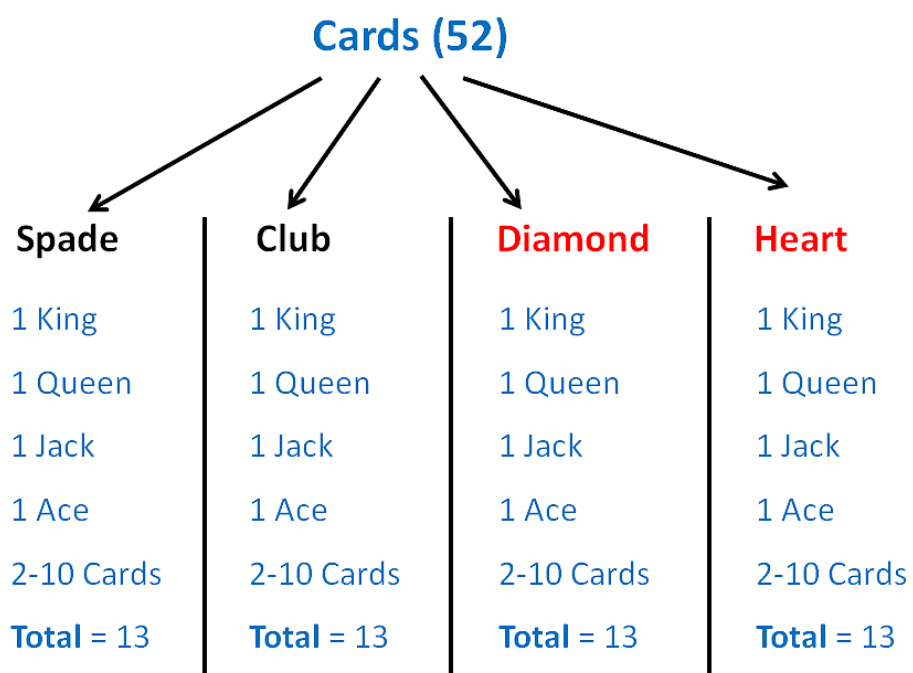
</div>

Here is a condition that the card is clubs.<br>
Now while calculating the probability my denominator will not be 52, instead, it will be 13 because the total number of cards in clubs is 13.

Since we have only one king in clubs the probability of getting a KING given the card is clubs will be 1/13 = 0.077.

### Example-2

Consider a random experiment of tossing 2 coins. The sample space here will be:

S = {HH, HT, TH, TT}

If a person is asked to find the probability of getting a tail his answer would be 3/4 = 0.75

Now suppose this same experiment is performed by another person but now we give him the condition that both the coins should have heads. This means if event A: ‘Both the coins should have heads’, has happened then the elementary outcomes {HT, TH, TT} could not have happened. Hence in this situation, the probability of getting heads on both the coins will be 1/4 = 0.25

## Bayes Theorem
The Bayes theorem gives us the conditional probability of event B, given that event A has occurred.

<div>
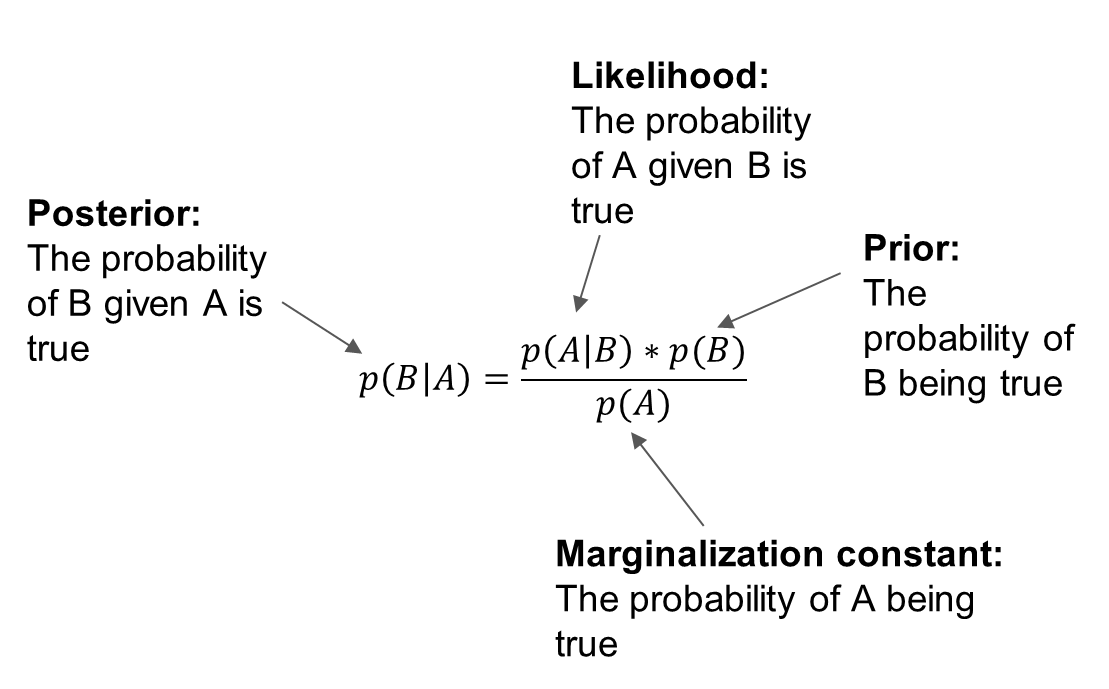
</div>

Using Bayes theorem, we can find the probability of B happening, given that A has occurred. Here, A is the evidence(data) and B(class) is the hypothesis. 

<div>
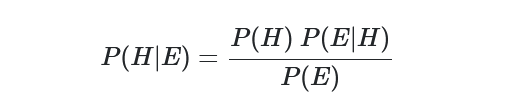
</div>


Where:
    
    P(B|A) is called the posterior probability i.e., Probability of an event after the evidence is seen.
    P(B) is called "prior probability" which means it is the probability of an event before the evidence.
    P(A|B) is the likelihood, which is the probability of the evidence A given Hypothesis is True.
    P(A) is probability of event A before the evidence. This is also known as the “marginal constant”

<div>
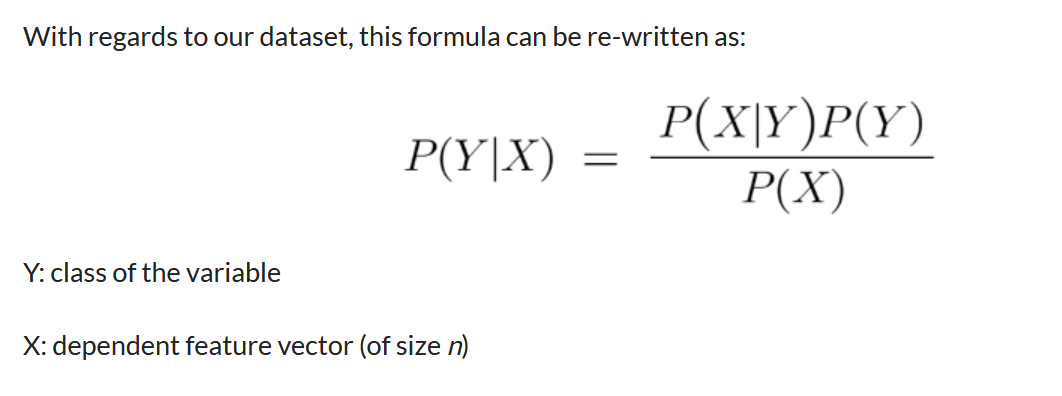
</div>

**Note**

The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive.

### Assumptions of Naive Bays

1. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive. That is, if the temperature is hot, it does not necessarily mean that the humidity is high. 

2. Another assumption made here is that all the predictors have an equal effect on the outcome. That is, the day being windy does not have more importance in deciding to play golf or not.

### Example

Consider the following example of tossing two coins. If we toss two coins and look at all the different possibilities, we have the sample space as: {HH, HT, TH, TT}

**Question: What is the probability of the second coin being head given the first coin is tail?**

Now in this sample space, let A be the event that the second coin is head, and B be the event that the first coin is tails.

We're going to focus on A, and we write that out as a probability of A given B:

Probability = P(A|B) = P(Second coin being head given first coin is tail)

= [ P(B|A) * P(A) ] / P(B)

= [ P(First coin being tail given the second coin is the head) * P(Second coin being

head) ] / P(First coin being tail)

= [ (1/2) * (1/2) ] / (1/2)

= 1/2 = 0.5

## Demo 4.1: Classification Using Naive Bayes Algorithm

1. Import the required Python packages.
2. Generate 100 random samples data which include 5 columns ['number of clouds', 'temperature', 'humidity', 'wind speed’, ‘play’].
3. Execute the following data pre-processing steps:
    1. Data encoding.
    2. Data splitting.
    3. Use the Naïve Bayes algorithm to train the model.
    4. Evaluate the model.
    5. Interpret the result using visualization.

### 1. Import the required Python packages.

In [30]:
import pandas as pd
import numpy as np  
import seaborn as sb
from numpy.random import default_rng
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix 
from matplotlib.colors import ListedColormap 
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report

### 2. Generate 100 random samples data which include 5 columns ['number of clouds', 'temperature', 'humidity', 'wind speed’, ‘play’].

In [6]:
#just example
rng=default_rng()
rng.standard_normal(10)#generated nomrally distributed samples

array([-0.87281673, -0.66852533, -0.82731967, -0.39663048, -0.32042284,
       -0.20972145, -0.11160176, -1.27157288, -0.09666591,  0.20881001])

In [7]:
features=['number of clouds', 'temperature', 'humidity', 'wind speed']
n=100
cl=3+rng.standard_normal(n)*1
temp=20+rng.standard_normal(n)*2
hum=15+rng.standard_normal(n)*20
wind=15+rng.standard_normal(n)*5

x=np.array([cl,temp,hum,wind]).T
# .T means transposing 

y=np.ones(x.shape[0])
#lets take these condition to generate 0 in y
#clouds>3,humidity>80%,wind speed>20kmph
y[x[:,0]>3],y[x[:,2]>80],y[x[:,3]>20]=0,0,0
np.unique(y,return_counts=True)

(array([0., 1.]), array([63, 37], dtype=int64))

In [8]:
df=pd.DataFrame(list(zip(cl,temp,hum,wind,y)),columns=["cloud","temp","humidity","wind_speed","y"])
df

,cloud,temp,humidity,wind_speed,y
0,2.197950,18.939789,39.916531,14.936215,1.0
1,2.032871,17.910006,25.630988,16.118493,1.0
2,3.293733,18.054412,26.603109,20.939893,0.0
3,3.055560,20.076629,-20.434699,15.985044,0.0
4,2.058130,19.724854,20.876455,22.114896,0.0
...,...,...,...,...,...
95,3.501079,19.470763,17.609219,18.845921,0.0
96,0.936953,18.514380,29.232263,15.756812,1.0
97,2.612705,18.388013,29.149676,10.833697,1.0
98,4.206309,21.510494,2.929727,20.856037,0.0


### Data Encoding

In [9]:
l=df.columns.to_list()
for i in l:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
df["cloud"].unique()

array([23, 18, 53, 46, 19, 35, 84, 48, 39, 14,  0, 57, 68, 67, 75, 22, 88,
       92, 72, 13, 21, 11, 36, 65, 30, 31, 64, 52, 91, 71, 43, 10, 49, 69,
       94, 99,  7, 98, 61, 81, 58, 40, 90, 85, 28, 95,  6, 44, 33, 77,  3,
        2, 20, 73, 26, 74, 32, 93, 66, 83, 25,  1, 12, 37, 97, 70, 63, 96,
       56, 89, 76, 38, 41, 79, 78, 62, 47, 86, 60, 24,  8, 51, 42,  5, 82,
       15, 54,  9, 16, 45, 50, 55, 27, 17, 87, 59,  4, 34, 80, 29],
      dtype=int64)

### Data Splitting

In [10]:
x=df.iloc[:,[1,2]].values
y=df.iloc[:,4].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_test.shape

(25, 2)

### Data Scaling

In [11]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Build the model

In [12]:
#gaussian naive bayes 

In [16]:
classifier=GaussianNB()
classifier.fit(x_train,y_train)


GaussianNB()

### Predict Data

In [17]:
y_pred=model.predict(x_test)
y_pred.shape,x_test.shape

((25,), (25, 2))

### Evaluate the Model

In [18]:
classifier.score(x_train,y_train)

0.6933333333333334

In [19]:
y_test.shape,y_pred.shape

((25,), (25,))

In [20]:
confusion_matrix(y_test,y_pred)

array([[14,  3],
       [ 8,  0]], dtype=int64)

In [21]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        17
           1       0.00      0.00      0.00         8

    accuracy                           0.56        25
   macro avg       0.32      0.41      0.36        25
weighted avg       0.43      0.56      0.49        25



### Data Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


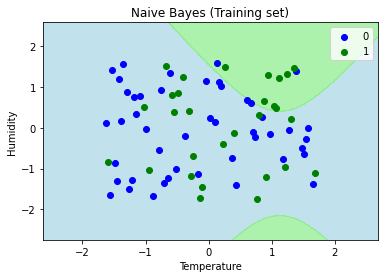

In [22]:
# # Visualizing the Train set results  
x_set, y_set = x_train, y_train  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightgreen')))  
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
     plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue', 'green'))(i), label = j)  
plt.title('Naive Bayes (Training set)')  
plt.xlabel('Temperature')  
plt.ylabel('Humidity')  
plt.legend()  
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


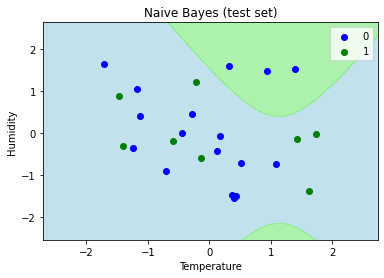

In [23]:
# Visualizing the Test set results  
x_set, y_set = x_test, y_test  
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),  
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),  
             alpha = 0.75, cmap = ListedColormap(('lightblue', 'lightgreen')))  
plt.xlim(X1.min(), X1.max())  
plt.ylim(X2.min(), X2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
                c = ListedColormap(('blue', 'green'))(i), label = j)  
plt.title('Naive Bayes (test set)')  
plt.xlabel('Temperature')  
plt.ylabel('Humidity')  
plt.legend()  
plt.show()  

# What is a Decision Tree?

Decision trees are a popular supervised learning method for a variety of reasons. Benefits of decision trees include that they can be used for both regression and classification, they are easy to interpret and they don’t require feature scaling. 

They have several flaws including being prone to overfitting. 

- A decision tree is a tree-based supervised learning method used to predict the output of a target variable. 
- Decision trees in Python can be used to solve both classification and regression problems—they are frequently used in determining odds. 

The following is an example of a simple decision tree used to classify different animals based on their features. We will be using the color and height of the animals as input features.

<div>
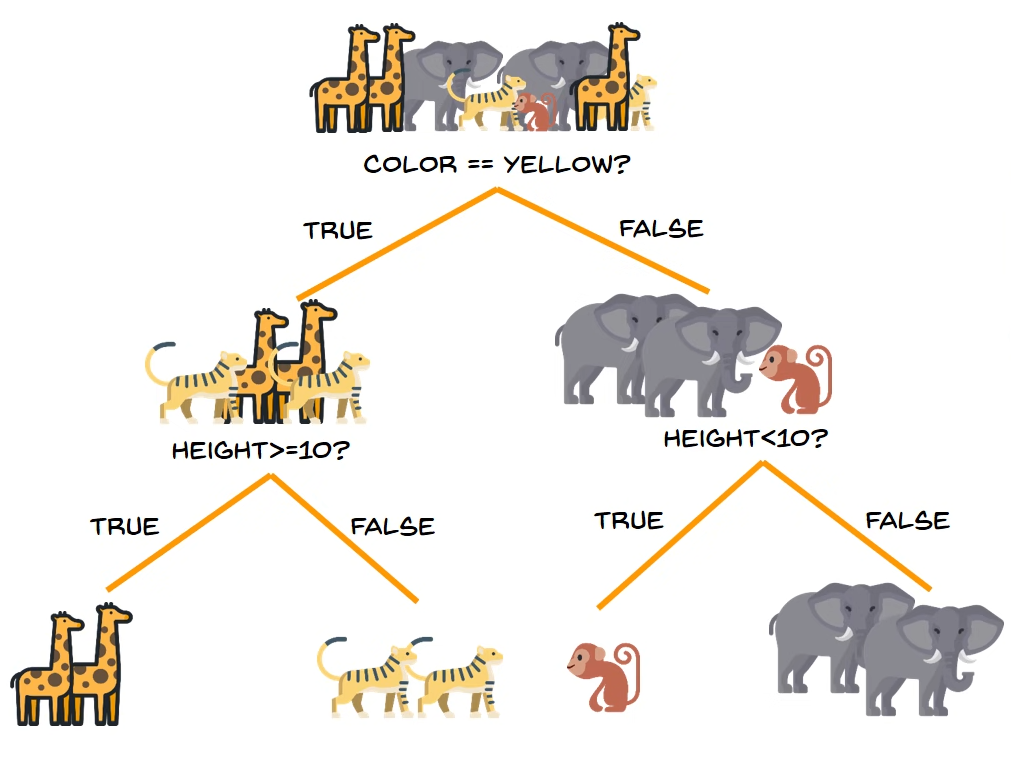
</div>

# Demo 4.2: Decision Tree - Classification

1. Import the required Python packages.
2. Explore the data.
3. Prepare the data.
4. Model a Decision Tree Classifier.
5. Evaluate the model performance.
6. Visualize the results.

### 1. Import the required Python packages.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [25]:
df=pd.read_csv("DS2_C5_S4_Diabetes_Data_Concept.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Data Exploration

In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

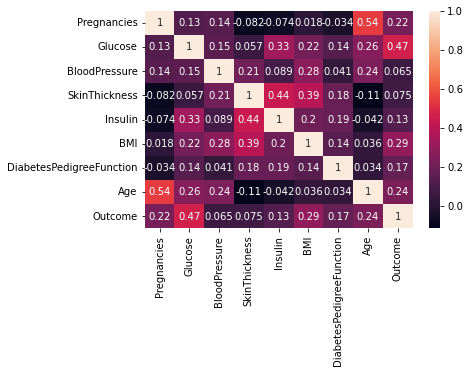

In [32]:
sb.heatmap(df.corr(),annot=True)

### Preparation of Data

In [34]:
l=df.columns
l

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
x=df[["Glucose","Age","BMI","Pregnancies"]]
y=df["Outcome"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [45]:
x_train.shape,x_test.shape,y_test.shape

((576, 4), (192, 4), (192,))

### Modeling - Decision Tree Classifier

Preprune decision trees means, you can set the maximum depth to stop the growth of the decision tree past a certain depth.

In [104]:
classfier=DecisionTreeClassifier(max_depth=2,random_state=30)
classfier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=30)

In [105]:
y_pred=classfier.predict(x_test)

I set the max_depth = 3 to preprune my tree to make sure it doesn’t have a depth greater than 2.

### Evaluation

In [106]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [107]:
classfier.score(x_test,y_test)

0.75

In [108]:
confusion_matrix(y_test,y_pred)

array([[118,  12],
       [ 36,  26]], dtype=int64)

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       130
           1       0.68      0.42      0.52        62

    accuracy                           0.75       192
   macro avg       0.73      0.66      0.68       192
weighted avg       0.74      0.75      0.73       192



## Tuning the Depth of a Tree

Finding the optimal value formax_depth is one way way to tune your model. The code below outputs the accuracy for decision trees with different values for max_depth.

In [110]:
# List of values to try for max_depth:
max_depth_range = list(range(1,10))# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 30)
    clf.fit(x_train, y_train)    
    score = clf.score(x_test, y_test)
    accuracy.append(score)
accuracy

[0.75,
 0.75,
 0.7552083333333334,
 0.7604166666666666,
 0.7708333333333334,
 0.734375,
 0.7552083333333334,
 0.7708333333333334,
 0.7291666666666666]

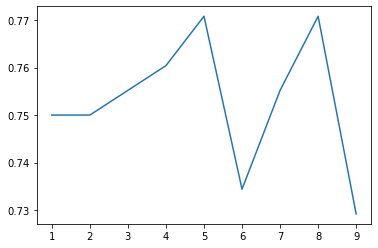

In [111]:
fig,ax=plt.subplots(figsize=(6,4))
ax.plot(range(1,10),accuracy)

## Feature Importance

One advantage of classification trees is that they are relatively easy to interpret. Classification trees in scikit-learn allow you to calculate feature importance which is the total amount that gini index or entropy decrease due to splits over a given feature. Scikit-learn outputs a number between 0 and 1 for each feature. All feature importances are normalized to sum to 1. 

In [112]:
import numpy as np
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
print(importances)

       feature  importance
0      Glucose       0.425
2          BMI       0.242
1          Age       0.232
3  Pregnancies       0.101


### Visualization

In [113]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


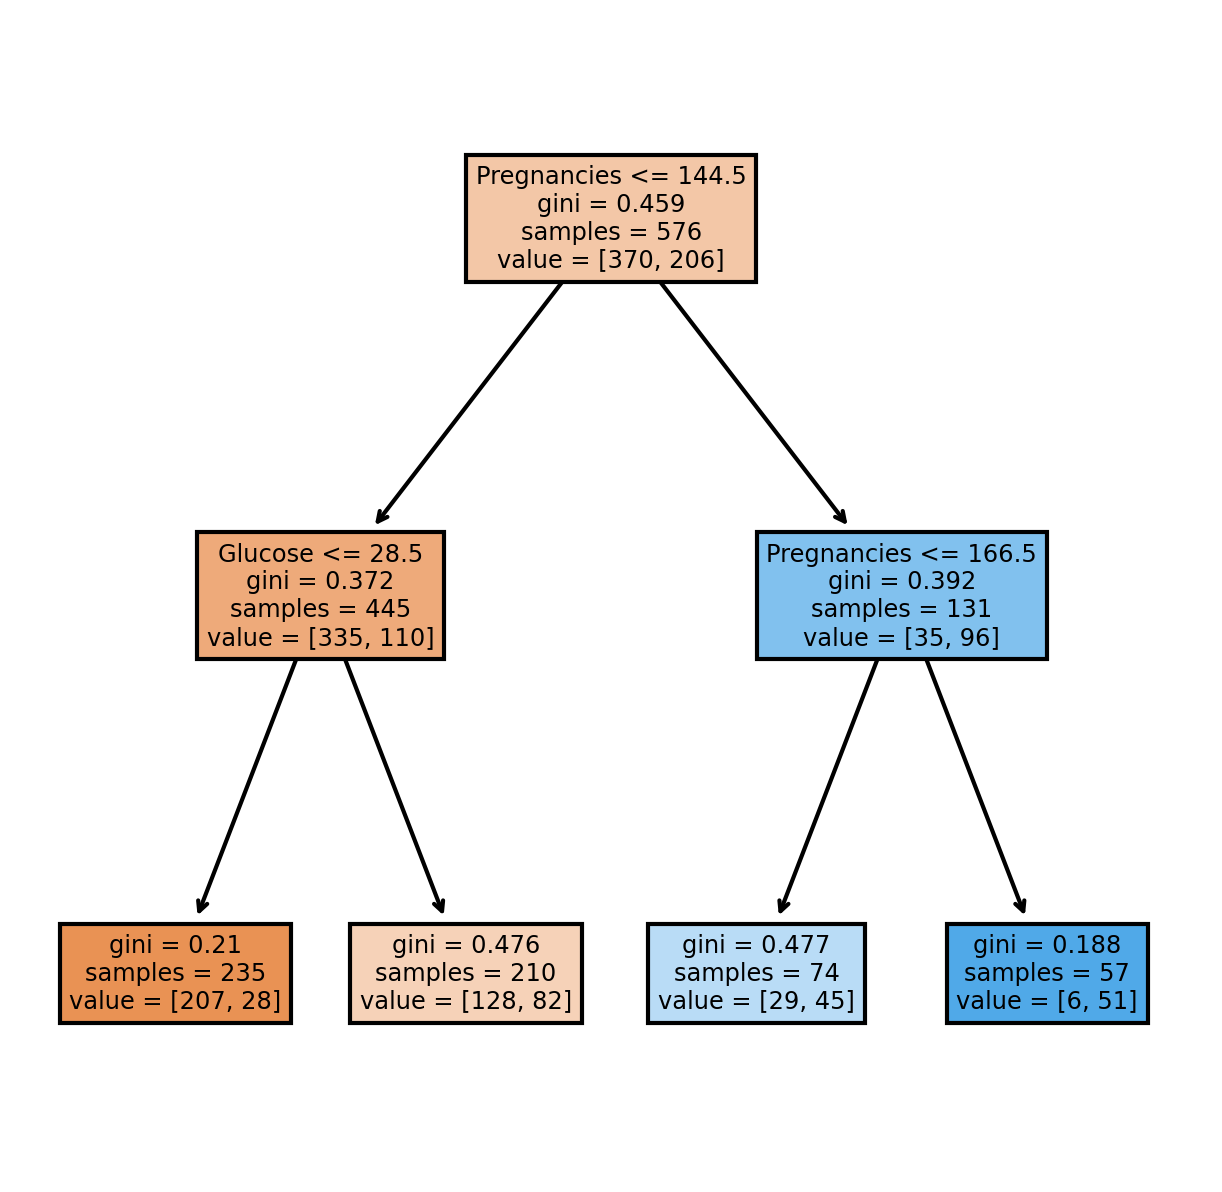

In [114]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=300)
tree.plot_tree(classfier,feature_names=l,filled=True)
fig.savefig("dt.png")
plt.show()

### Understanding the Contents of a Node in Decision Tree

**1. glucose<=129.5:** It means, if the glucose is less than 129.5. Based on the result, it either follows the true or the false path.
**2. gini=0.449:** The function to measure the quality of a split. Supported criteria are **“gini”,“log_loss” and “entropy”**.

The gini score is a metric that quantifies the purity of the node/leaf (more about leaves in a bit). A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist. You can find out more about impurity measures here. Notice that we have a gini score greater than zero; therefore, we know that the samples contained within the root node belong to different classes.

**3. samples=537:** It define the total no of samples.

**4. values=[354,183]:** The value list tells you how many samples at the given node fall into each category. The first element of the list shows the number of samples that belong to the 0(Non Diabetic) class, the second element of the list shows the number of samples that belong to the 1(Diabetic) class

## The Selection Criterion
This section is really about understanding what is a good split point for root/decision nodes on classification trees. Decision trees split on the feature and corresponding split point that results in the **largest information gain (IG)** for a given criterion (gini or entropy). 

Loosely, we can define information gain as

**IG = information before splitting (parent) — information after splitting (children)**

Since classification trees have binary splits, the formula can be simplified into the formula below.

<div>
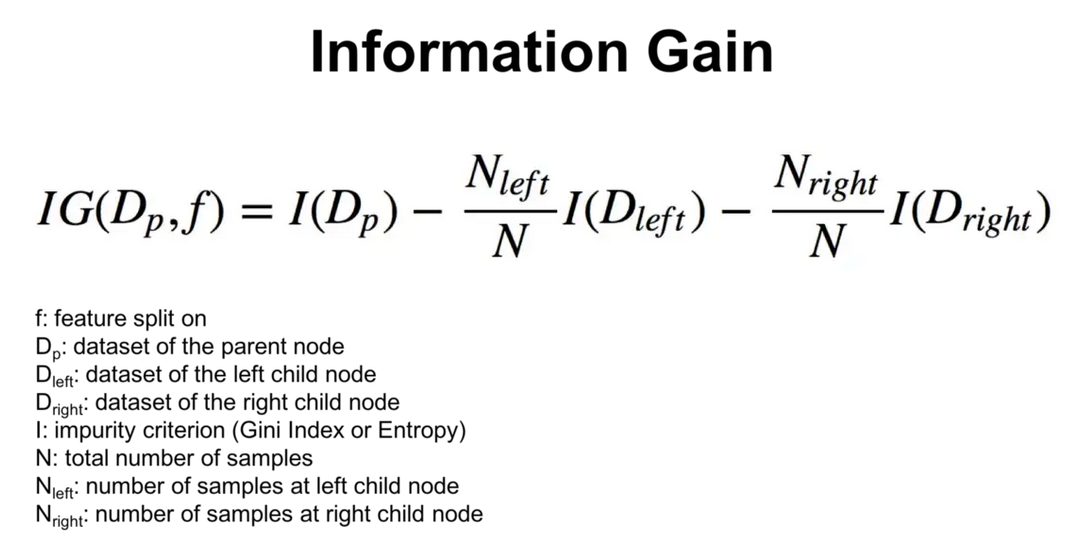
</div>

<div>
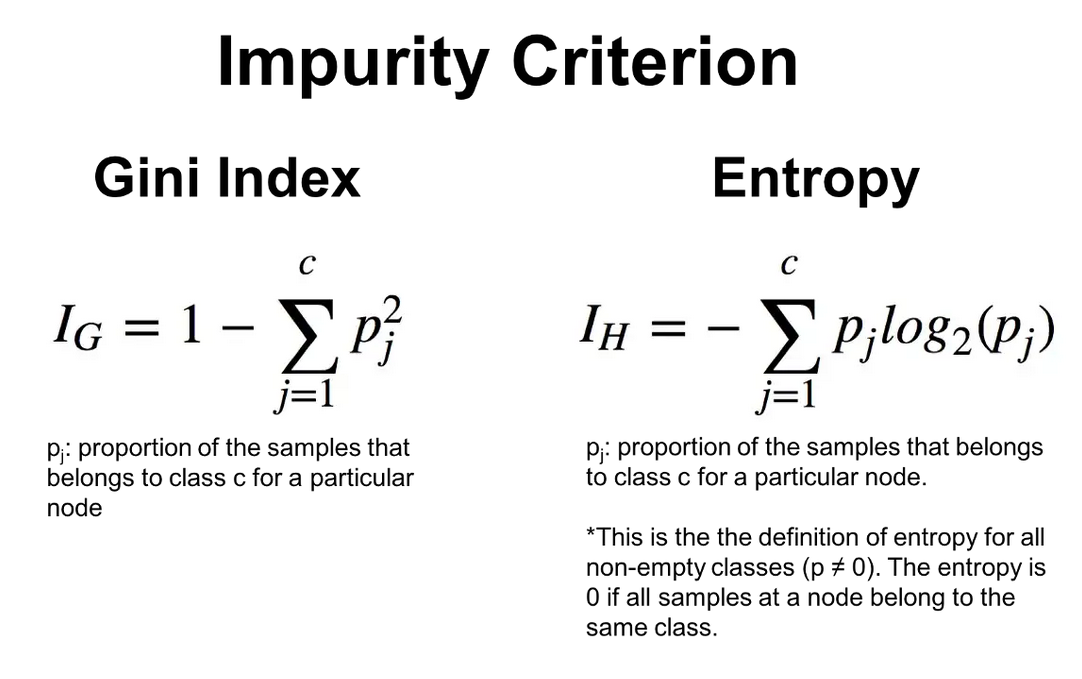
</div>